# Data Storytelling

__[Data used for this exercise can be found here](https://www.kaggle.com/wendykan/lending-club-loan-data)__

## Guiding principles learnt in Module 7

1. Know your audience.<br>
2. Know the questions you are answering.<br>
3. Highlight the major insights and surprises.

#### Achieve the above listed points by: 
1. Narrating a story and make sure it has 3 components - beginning, middle and end. 
    - Have a predicament
    - Resolve the predicament
    - Provide reasoning or pathway
2. Focusing on Clarity
    - Clarity of Message
    - Clarity of Slides
    - Clarity of Delivery
3. Choosing and using notations carefully.<br>
4. Creating a sense of directions with clear flow of logic. <br>
5. Laying out assumptions.<br>
6. Making sure there is one key take away.

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

Make sure it displays all columns. None here means unlimited.So now when you do head, it shows all columns. Also, set the axes style and color pallete.

In [2]:

pd.set_option('max_columns',None)

sns.set(style='white',color_codes=True)

%matplotlib inline

### First we will read the csv file and see what's in the file

In [3]:
loans_data = pd.read_csv('loan.csv', low_memory=False)
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding the data that is in our file

In [4]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

Describe when used with the 'all' option helps us understand the non-numerical columns too. The describe( ) command just
provides numerical columns data.

In [5]:
loans_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,887350.000000,433067.000000,137053.000000,887350.000000,887350.000000,8.873790e+05,886877.000000,887350.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,887234.000000,221703.000000,887379.0,511.000000,509.000000,887350.000000,8.171030e+05,8.171030e+05,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,0.694623,34.063798,70.117903,11.548469,0.195307,1.692079e+04,55.067693,25.268026,8403.124852,8399.713242,7558.826684,7521.160306,5757.706424,1754.804327,0.396692,45.919243,4.880757,2164.145585,0.014380,44.104838,1.0,109981.011585,18.310118,0.004991,2.257026e+02,1.394582e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,0.998448,21.884940,28.127914,5.317313,0.582091,2.242679e+04,23.834344,11.840561,8493.450269,8489.997617,7871.243336,7846.108604,6625.441046,2095.356099,4.087825,409.693874,63.125281,4794.783233,0.134191,22.179841,0.0,52730.379847,7.169233,0.077625,1.031137e+04,1.537500e+05,1.242675,3.089987,0.996035,1.688725,27.209081,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,17950.000000,3.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,0.000000,15.000000,51.000000,8.000000,0.000000,6.443000e+03,37.700000,17.000000,0.000000,0.000000,1914.590000,1899.700000,1200.570000,441.460000,0.000000,0.000000,0.000000,280.170000,0.000000,27.000000,1.0,76032.500000,13.200000,0.000000,0.000000e+00,2.985300e+04,0.000000,1.000000,0.000000,0.000000,6.000000,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,70.000000,11.000000,0.000000,1.187500e+04,56.000000,24.000000,6458.290000,6455.810000,4894.999117,4862.010000,3215.320000,1073.280000,0.000000,0.000000,0.000000,462.780000,0.000000,44.000000,1.0,101771.000000,17.610000,0.000000,0.000000e+00,8.055900e+04,1.000000,2.000000,0.000000,1.000000,12.000000,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.0000

### Visual Exploratory Data Analysis for understanding loans

### Question1: What is the distribution of Loans by Loan Amount?

### Understanding Loan Amounts

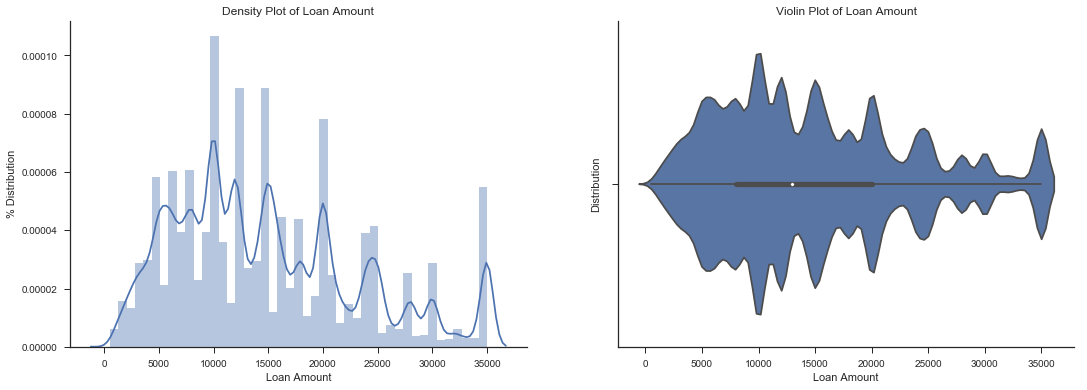

Dist plot is a combination of histogram and kernal density estimate.
Violin plot is a combination of boxplot and kernal density estimate. The violin plot shows that the median is at 13000 and most of the loans lie between 8000 to 20,000.


The distribution plot and violin plot, both show that most of the loans are of amount 10000.


In [6]:
#setting the style of the plot
sns.set_style("ticks")

#visual EDA to understand the distribution of the loan amount
#creating two plots, one is distribution and the other is violin plot too see the loan amount distribution
fig, axs = plt.subplots(1,2,figsize=(18,6))

sns.distplot(loans_data.loan_amnt, bins = 45,ax=axs[0])
axs[0].set(xlabel='Loan Amount', 
       ylabel='% Distribution',title='Density Plot of Loan Amount')
sns.violinplot(loans_data.loan_amnt, ax=axs[1])
axs[1].set(xlabel='Loan Amount', 
       ylabel='Distribution',title='Violin Plot of Loan Amount')
sns.despine()
plt.show()
print("Dist plot is a combination of histogram and kernal density estimate.")
print("Violin plot is a combination of boxplot and kernal density estimate. The violin plot shows that the median is at 13000 and most of the loans lie between 8000 to 20,000.")
print("\n")
print("The distribution plot and violin plot, both show that most of the loans are of amount 10000.")

In [7]:
# We saw above that most of the loans are for amount 10,000, so I wanted to see exactly how many.
print("Number of loans with loan amount as 10,000 are:",loans_data.id[loans_data['loan_amnt'] == 10000].count())

Number of loans with loan amount as 10,000 are: 61837


### Question 2: 
#### a) How many Loans do we have by Loan Status/Purpose?
#### b) What is the distribution of Loan Amount by Loan Status?

### Understanding loan status

Understanding Unique values in our loan status column.

In [8]:
np.unique(loans_data['loan_status'])

array(['Charged Off', 'Current', 'Default',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid', 'Fully Paid',
       'In Grace Period', 'Issued', 'Late (16-30 days)',
       'Late (31-120 days)'], dtype=object)

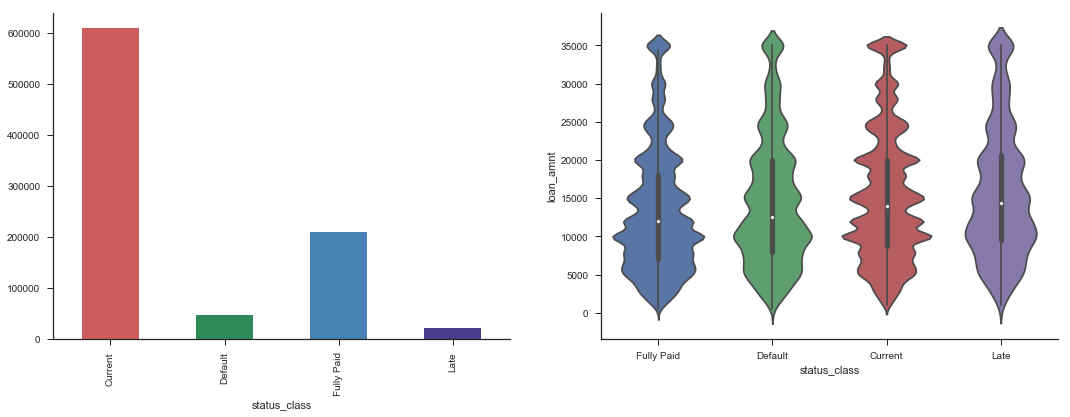

In [21]:
plt.rcParams['figure.figsize'] = (9,9)
def status_class(text):
    if text in ('Fully Paid' ,'Does not meet the credit policy. Status:Fully Paid'):
        return 'Fully Paid'
    elif text in ('Charged Off' ,'Default' ,'Does not meet the credit policy. Status:Charged Off'):
        return 'Default'
    elif text in ('Current','Issued'):
        return 'Current'
    elif text in ('Late (16-30 days)' ,'Late (31-120 days)','In Grace Period'):
        return 'Late'
    else:
        return 'Unknown'

loans_data['status_class']=loans_data['loan_status'].apply(status_class)

fig, axs = plt.subplots(1,2,figsize=(18,6))
colors = ['indianred','seagreen','steelblue','darkslateblue']
loans_data.groupby('status_class').size().plot(kind='bar',ax=axs[0], color = colors)
plt.ylabel("Number of loans")
sns.violinplot(x = "status_class",y = "loan_amnt", data=loans_data, ax=axs[1])
sns.despine()


### Exploring different reasons for which the loan was issued



We see here that most of the loans are for debt consolidation or to pay credit cards.


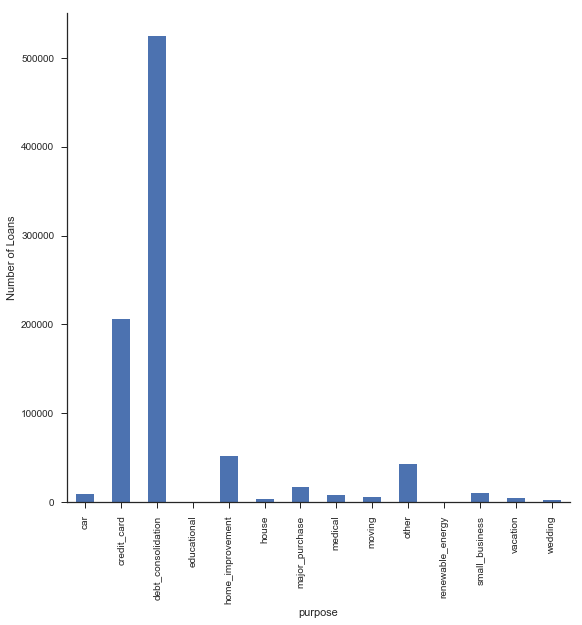

In [24]:
plt.rcParams['figure.figsize'] = (9,9)
loans_data.groupby('purpose').size().plot(kind='bar')
plt.ylabel("Number of Loans")
sns.despine()

print("\n")
print("We see here that most of the loans are for debt consolidation or to pay credit cards.")

### Question3: What is the length of employment of our borrowers?

## Now, understanding our borrowers

### Length of employment

In [25]:
np.unique(loans_data.emp_length)

array(['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years',
       '6 years', '7 years', '8 years', '9 years', '< 1 year', 'n/a'], dtype=object)

How many loans have 'n/a' as the employment length data

In [26]:
loans_data.id[loans_data['emp_length'] == 'n/a'].count()

44825

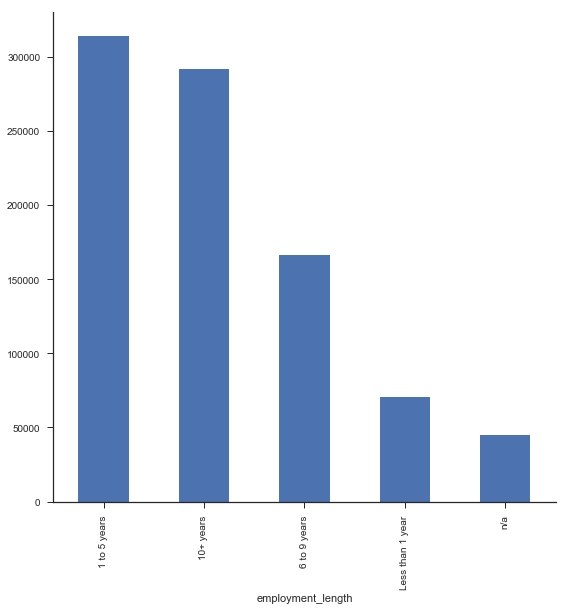

In [28]:
plt.rcParams['figure.figsize'] = (9,9)
def employment_len(text):
    if text=='10+ years':
        return '10+ years'
    elif text in ('1 year','2 years', '3 years', '4 years','5 years'):
        return '1 to 5 years'
    elif text in ('6 years', '7 years', '8 years', '9 years'):
        return '6 to 9 years'
    elif text== '< 1 year':
        return 'Less than 1 year'
    else:
        return 'n/a'

loans_data['employment_length']=loans_data['emp_length'].apply(employment_len)
loans_data.groupby('employment_length').size().plot(kind='bar')
sns.despine()

### Question 4: What is the distribution of annual income of our borrowers? 

### Understanding annual income

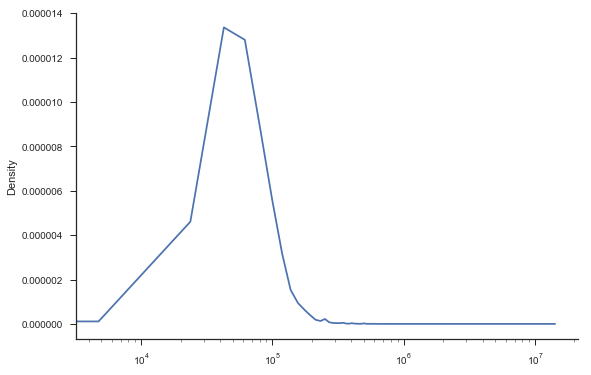

In [30]:
plt.rcParams['figure.figsize'] = (9,6)
loans_data["annual_inc"].plot.density(logx = True)
sns.despine()

### Question 5: What is the distribution of Interest Rate?

### Understanding Interest Rate

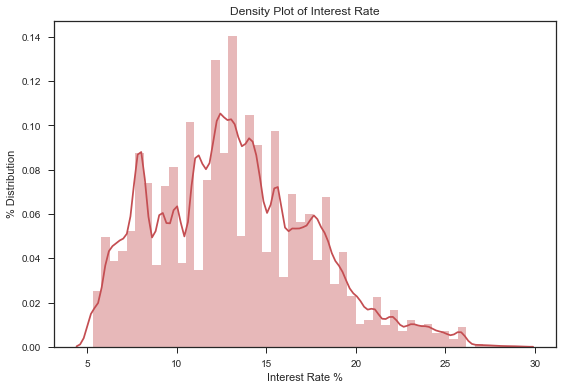

In [31]:
plt.rcParams['figure.figsize'] = (9,6)
ax=sns.distplot(loans_data.int_rate, color="r")
ax.set(xlabel='Interest Rate %', 
       ylabel='% Distribution',title='Density Plot of Interest Rate')

### Question 6: What is the distribution of Interest Rate by Term/Application Type/ Purpose

### Interest Rate by Term / Application Type / Purpose

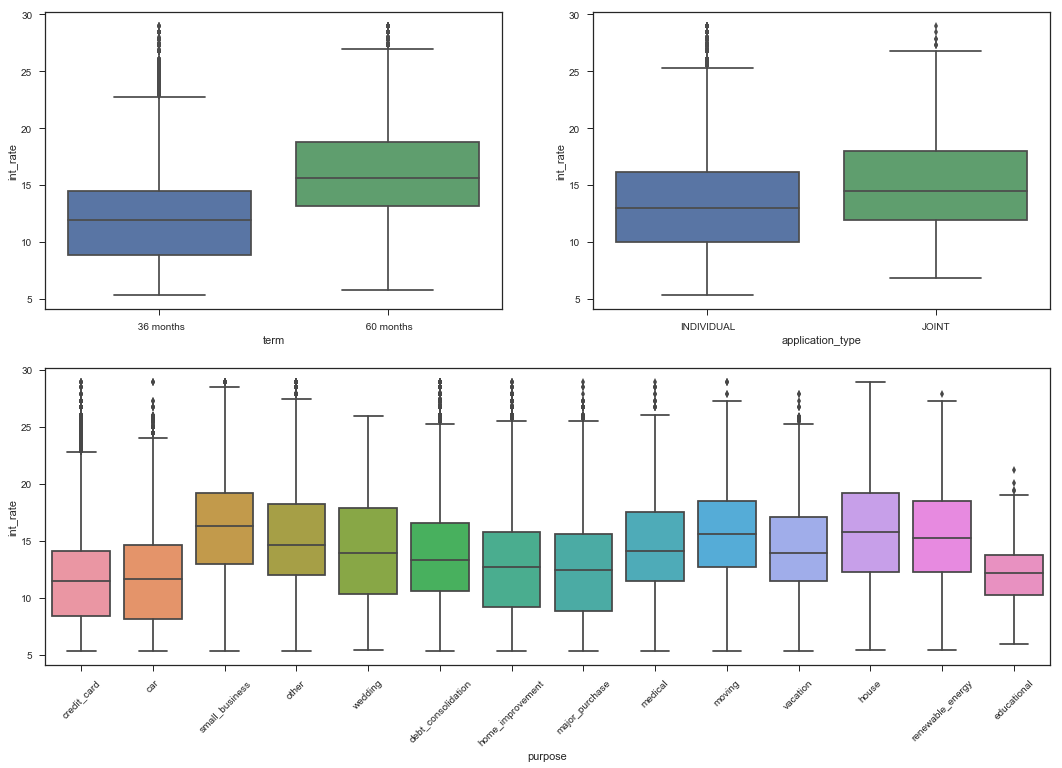

In [32]:
fig = plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
sns.boxplot(x='term', y='int_rate', data=loans_data)
plt.subplot(2,2,2)
sns.boxplot(x='application_type', y='int_rate', data=loans_data)
plt.subplot(2,1,2)
sns.boxplot(x='purpose', y='int_rate', data=loans_data)
plt.xticks(rotation=45)

plt.show()

There are 3 subplots displayed above to show the relationship between interest rate and other attributes. 

Plot1: This plot shows how the 60 months term has more interest rate than the 36 months. The interest rate increases with the term length.

Plot2: This plot shows how the application type affects the interest rate. The join application type has higher interest rate as compared to the individual application type.

Plot3: This plot shows the interest rate across various reasons for which the loan was issued and we see that 'small_business' loans and 'house' loans have the highest interest rate.


### Does Interest Rate and Loan Amount affect Loan Status?

### Status Class by Interest rate / Loan Amount

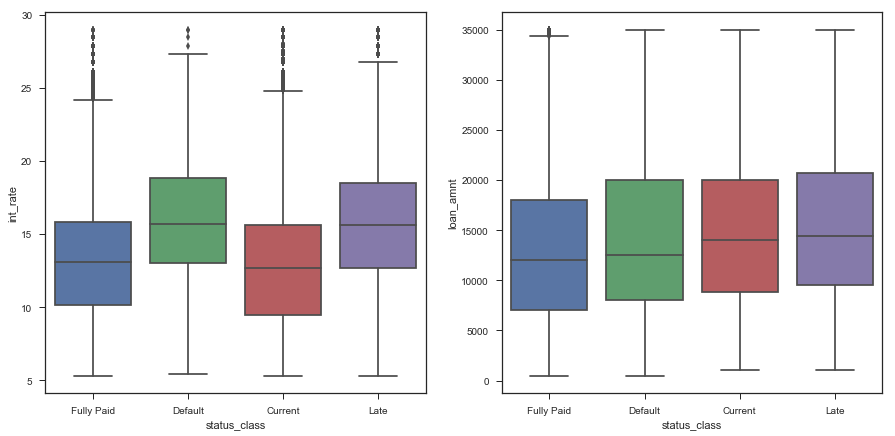

In [33]:
fig= plt.figure(figsize=(15,7))

plt.subplot(1,2,1)
sns.boxplot(x='status_class', y='int_rate', data=loans_data)
plt.subplot(1,2,2)
sns.boxplot(x='status_class', y='loan_amnt', data=loans_data)
plt.show()

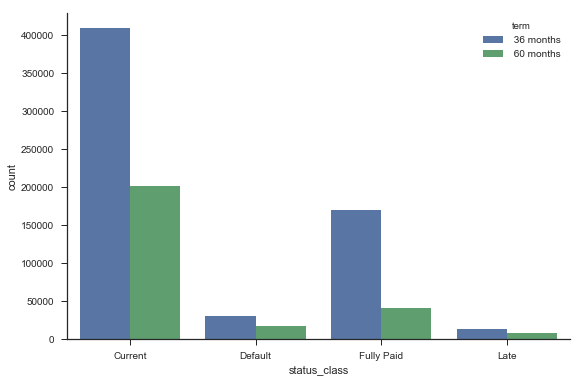

In [34]:
sns.countplot(x='status_class', hue = 'term',data = loans_data , order = ['Current','Default','Fully Paid', 'Late'])
sns.set_style("white")
sns.despine()

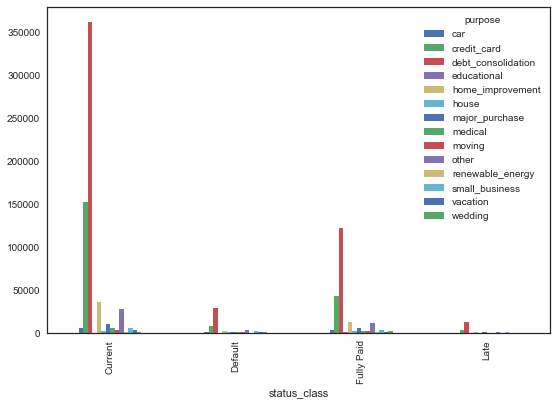

In [35]:
###I need to remove this one, didnt make much sense. Too many colors, too much going on.

loans_data.groupby(['status_class','purpose']).size().unstack().plot(kind='bar')

### Question 8: Does the interest rate change with the credit grade? 

### Understanding Credit Grade

In [ ]:
fig = plt.figure(figsize=(9,9))
sns.countplot(loans_data['grade'], order = ('A','B','C','D','E','F','G'))

### Interest Rate by Grade

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(18,6))
loans_data[['grade','int_rate']].groupby('grade').mean().plot(kind='bar', ax=axs[0])
sns.boxplot(x='grade', y='int_rate', data=loans_data, order = 'ABCDEFG', ax=axs[1])
plt.show()